In [1]:
%load_ext autoreload
%autoreload 2

n_topics = 10
n_iter = 200
n_words = 10
tolerance = 1e-2

In [2]:
from ldaGibbs import LDAGibbs

gibbs = LDAGibbs(
    "data/ap.dat",
    "data/ap.txt",
    "data/vocab.txt",
    n_topics=n_topics,
    n_iter=n_iter,
    tolerance=tolerance,
)

In [3]:
gibbs.load_model("models/gibbs_lda.npz")
# gibbs.fit(verbose=False, early_stop=True)

Topic 1: east, officials, west, military, united, war, army, air, german, troops
Topic 2: nbc, says, children, time, show, american, tax, company, three, get
Topic 3: soviet, party, united, political, officials, military, gorbachev, union, south, official
Topic 4: bush, dukakis, campaign, house, bill, republican, democratic, national, budget, senate
Topic 5: court, federal, company, case, judge, attorney, drug, trial, charges, department
Topic 6: billion, market, prices, stock, dollar, rose, trade, rates, yen, trading
Topic 7: school, court, city, yearold, time, found, told, day, ms, case
Topic 8: mrs, like, time, say, court, home, just, children, yearold, art
Topic 9: fire, officials, air, three, plane, spokesman, children, force, miles, pilot
Topic 10: cents, cent, lower, futures, prices, workers, higher, billion, time, farmers


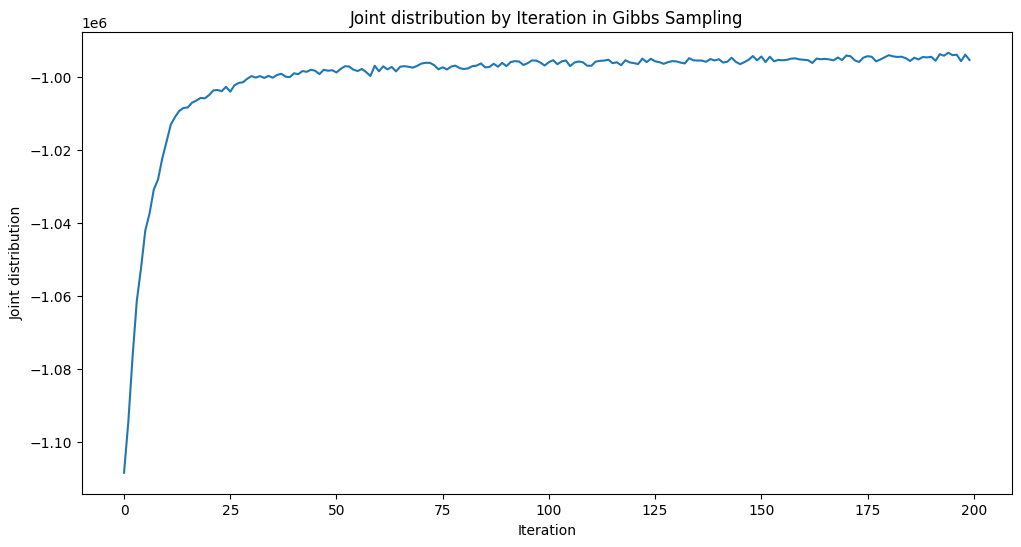

In [4]:
gibbs.export_model("models/gibbs_lda.npz")
gibbs.show_topics(n_words)
gibbs.plot_logs()

In [5]:
from ldaVI import LDAVI

vi = LDAVI(
    "data/ap.dat",
    "data/ap.txt",
    "data/vocab.txt",
    n_topics=n_topics,
    n_iter=n_iter,
    tolerance=tolerance,
)

In [8]:
vi.load_model("models/vi_lda.npz")
# vi.fit(verbose=False, early_stop=False)

Topic 1: party, bush, soviet, democratic, national, political, dukakis, south, leader, united
Topic 2: officials, billion, report, federal, united, time, program, bill, department, space
Topic 3: national, interview, time, members, school, shevardnadze, list, forest, nbc, cbs
Topic 4: killed, reported, fire, officials, miles, three, military, today, south, news
Topic 5: children, time, get, like, just, school, american, dont, says, city
Topic 6: soviet, billboard, german, union, east, west, bush, germany, issue, united
Topic 7: court, judge, case, attorney, federal, district, trial, charges, prison, death
Topic 8: air, plane, officials, soviet, iraq, force, military, united, spokesman, american
Topic 9: stock, billion, market, exchange, prices, points, index, average, rose, company
Topic 10: th, day, congress, hospital, party, communist, session, california, care, wednesday


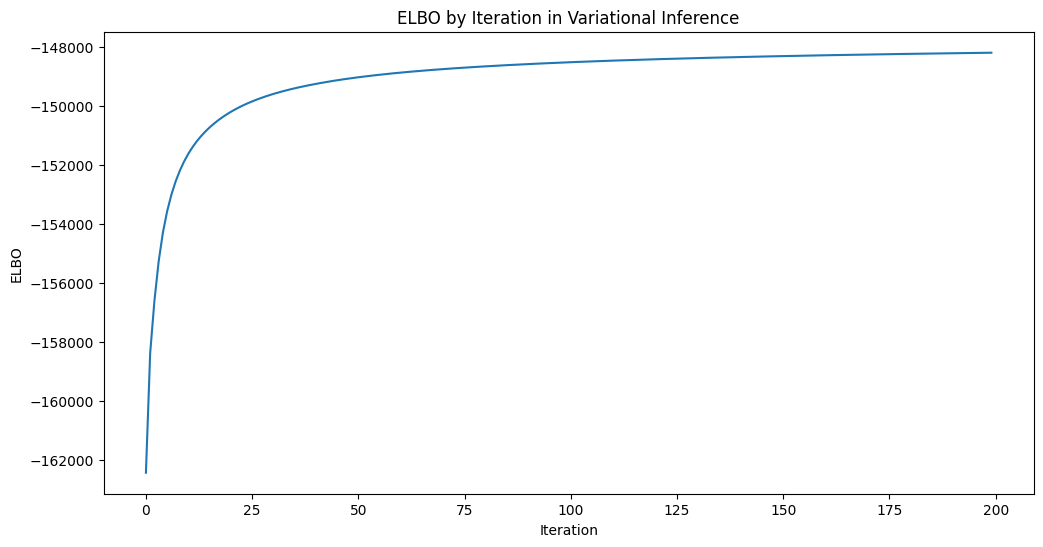

In [9]:
vi.export_model("models/vi_lda.npz")
vi.show_topics(n_words)
vi.plot_logs()

In [10]:
new_docs = [
    """In a tragic turn of events, clashes between the army and civilians in the southern region have resulted in the deaths of at least 30 people. The violence erupted during a protest against government policies, with demonstrators calling for greater accountability and reforms. Witnesses report that the situation escalated rapidly as police and military forces attempted to disperse the crowds. The government's use of force has been widely condemned by human rights organizations, which are calling for an immediate investigation into the incident. The government has urged calm and promised to investigate the circumstances that led to the fatalities. However, tensions remain high, and further protests are expected in the coming days as people demand justice for those killed. The international community is watching closely, with several countries urging the government to exercise restraint and engage in dialogue with the protesters to prevent further loss of life.""",
    """The stock market surged today, driven by impressive earnings reports from several leading companies. Notably, TechCorp announced a record profit of $200 million for the first quarter, a 30 percent increase from the same period last year. This news sent TechCorp’s stock soaring by 12 percent. Investors are optimistic as the market shows strong growth, with the S&P 500 and NASDAQ both rising by over 2 percent. Analysts attribute this positive trend to robust corporate earnings and a favorable economic outlook for the rest of the year. Other major companies also reported significant gains, contributing to the overall market upswing. This year is shaping up to be a lucrative one for investors, with many companies exceeding their projected earnings and boosting market confidence.""",
    """Tensions are escalating in the Middle East following a military incident near the Iraq-Kuwait border. A Kuwaiti Air Force plane was forced to make an emergency landing after encountering technical issues during a routine patrol in the region. The aircraft landed safely, and no injuries were reported. This incident occurs amid heightened military activity in the area, with both Iraqi and Kuwaiti forces on high alert. Increased air patrols and military exercises have been noted, raising concerns of potential clashes. The governments of Iraq and Kuwait are in communication to prevent any misunderstandings and to ensure stability in the region. The international community is urging both nations to exercise restraint and continue diplomatic efforts to maintain peace.""",
    """A high-profile drug trafficking case has commenced in federal court, drawing widespread attention. The trial, taking place in the Southern District of New York, involves a notorious drug cartel accused of operating a large-scale distribution network across multiple states. The prosecution, led by a seasoned federal attorney, has presented substantial evidence linking the defendants to significant drug operations. The defense attorney, known for handling high-stakes cases, is challenging the credibility of the evidence and witnesses. Federal Judge Michael Thompson is presiding over the trial, which is expected to last several weeks. The case's outcome could set a significant precedent for future drug-related prosecutions, highlighting the ongoing battle between state and federal jurisdictions in addressing narcotics crimes.""",
]

arr = gibbs.format_document(new_docs)

print(gibbs.infer_topics(arr))
print(vi.infer_topics(arr))

[3 6 1 5]
[4 9 8 7]
